In [21]:

# Uncomment to widen notebook cells for PDf export
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Image Processing Lab 3
## Zhanwen (Phil) Chen

1.

This problem explores the changes in color that occur when the individual bands of a true-color image are transformed independently of each other.
Find a truecolor image that contains a wide range of colors. Use the gamma correction function you wrote for Lab Assignment 2 to increase and decrease the overall brightness of each band separately. Display the original image and the 6 altered versions. Describe the differences between the images. Here, I recommend that you cut the same small region out of the original and the 6 altered images so that you can display them all on the same page together. These need not be enlarged. See Figure 1.

In [32]:
import numpy as np

def get_lut_gamma(gamma):
    adjusted = np.power(np.arange(256)/255, 1.0/gamma) * 255
    return np.rint(adjusted).clip(0, 255).astype('uint8')

def gamma_adjust(image, gamma, which_band=-1):
    lut_gamma = get_lut_gamma(gamma)
    if which_band == -1:
        return lut_gamma[image]
    
    new_channel = lut_gamma[image[:, :, which_band]]
    if which_band == 0:
        return np.dstack([new_channel, image[:, :, 1], image[:, :, 2]])
    
    if which_band == 1:
        return np.dstack([image[:, :, 0], new_channel, image[:, :, 2]])
    
    if which_band == 2:
        return np.dstack([image[:, :, 0], image[:, :, 1], new_channel])

red
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8
green
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8
blue
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8
gamma_adjust: new_channel.shape (3024, 4032) , new_channel.dtype = uint8


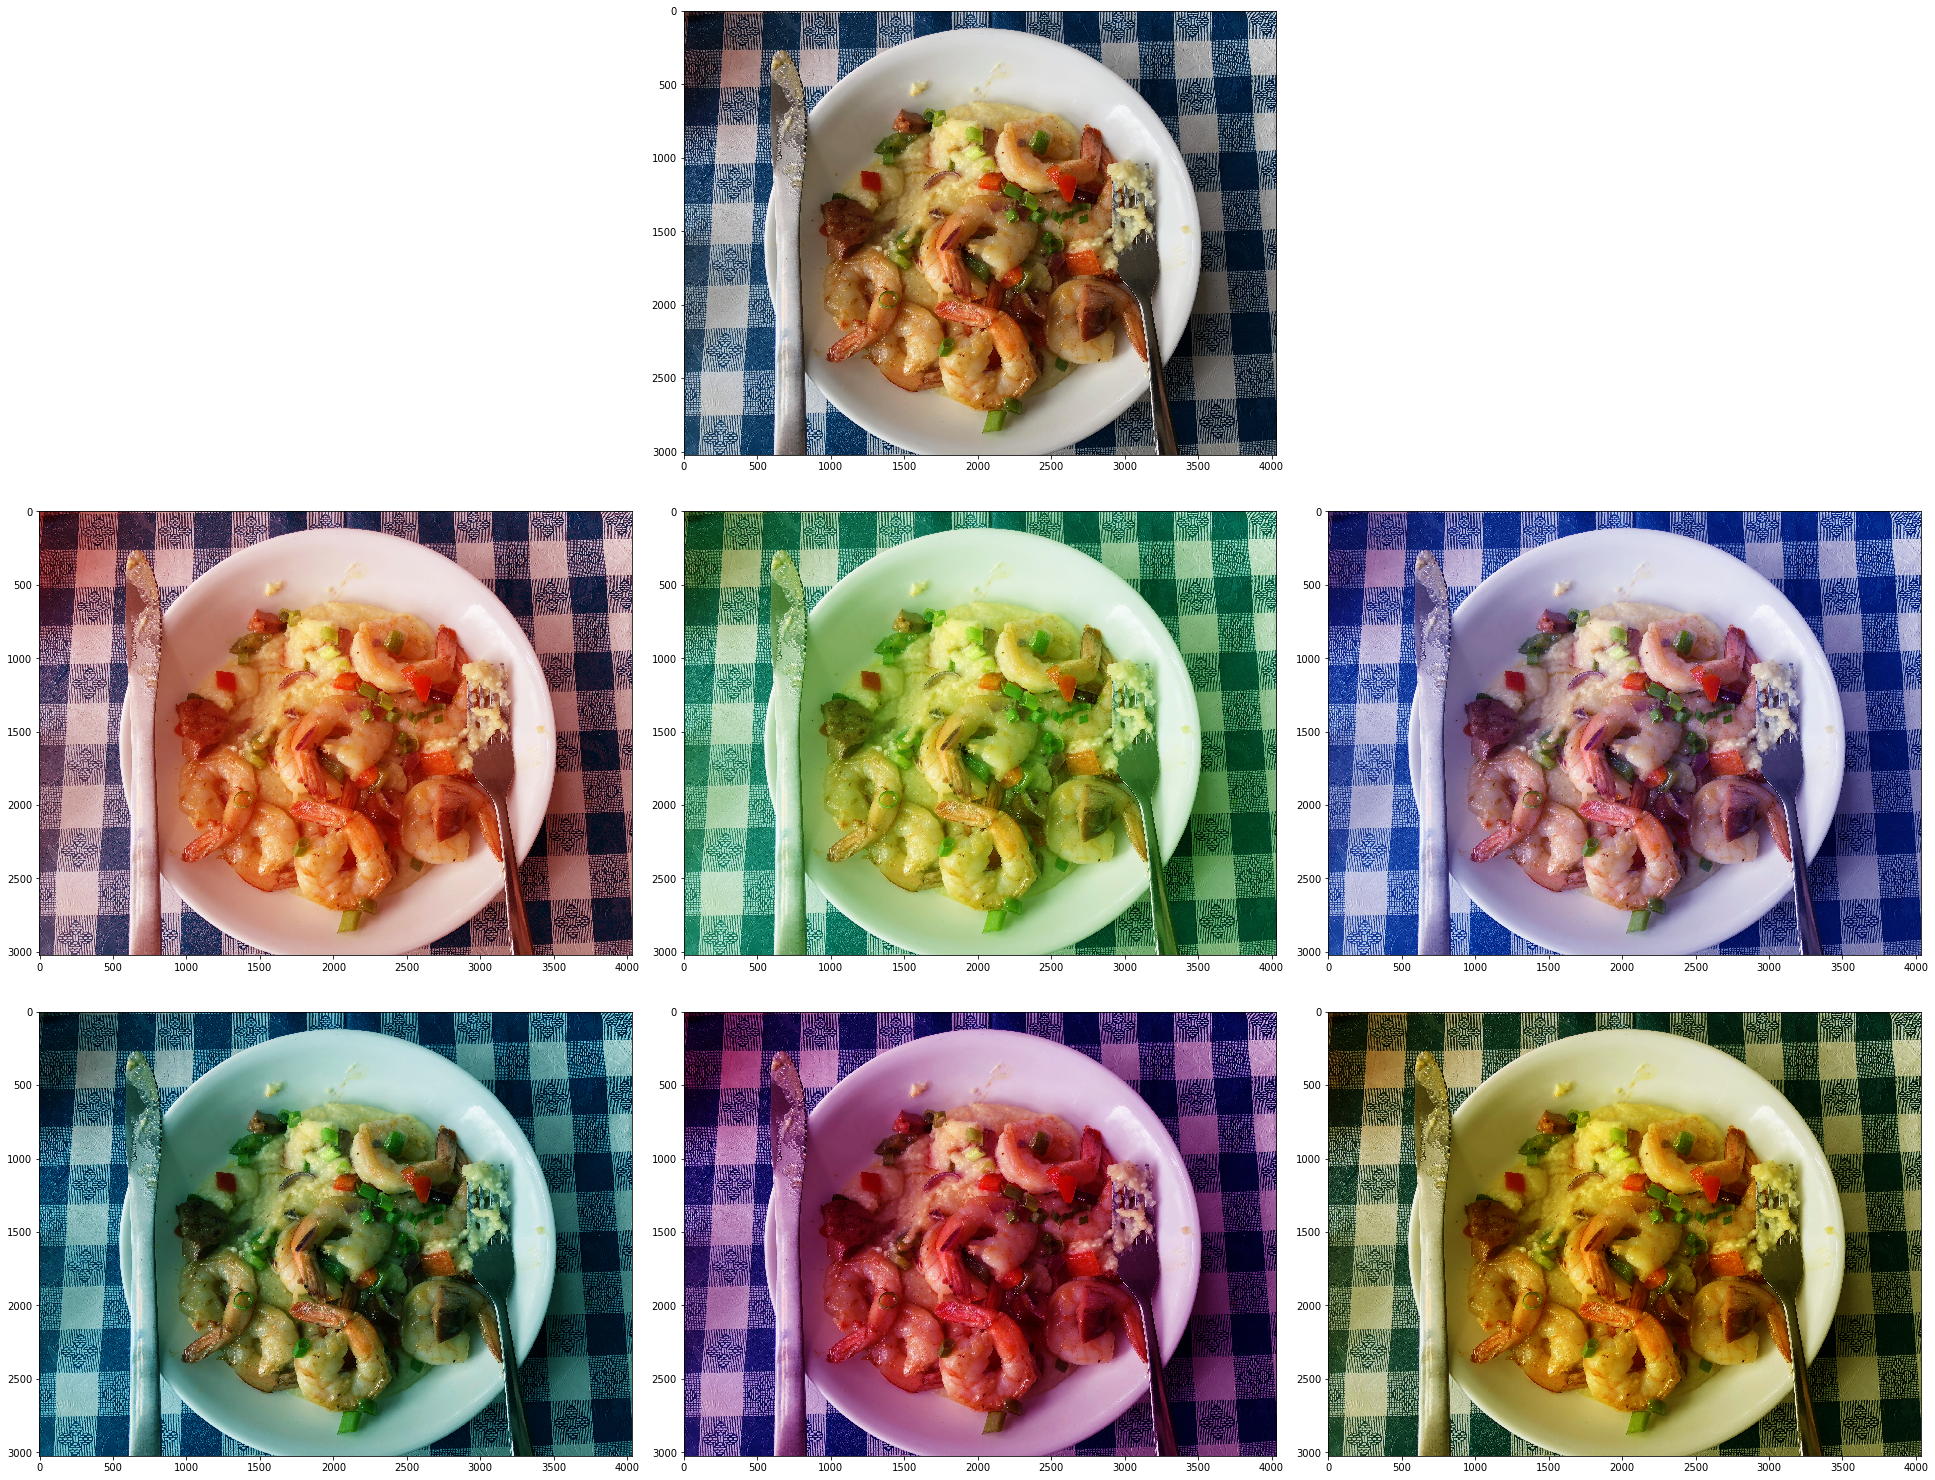

In [35]:
import matplotlib.pyplot as plt

image_fname = 'nashville_jam_cafe.jpg'
image_original = plt.imread(image_fname)

image_gamma_red_2 = gamma_adjust(image_original, 2, which_band=0)
image_gamma_red_0_5 = gamma_adjust(image_original, 0.5, which_band=0)

image_gamma_green_2 = gamma_adjust(image_original, 2, which_band=1)
image_gamma_green_0_5 = gamma_adjust(image_original, 0.5, which_band=1)

image_gamma_blue_2 = gamma_adjust(image_original, 2, which_band=2)
image_gamma_blue_0_5 = gamma_adjust(image_original, 0.5, which_band=2)

fig, axes = plt.subplots(3, 3, figsize=(27, 21))
fig.delaxes(axes[0,0])
fig.delaxes(axes[0,2])

axes[0,1].imshow(image_original)

axes[1,0].imshow(image_gamma_red_2)
axes[2,0].imshow(image_gamma_red_0_5)

axes[1,1].imshow(image_gamma_green_2)
axes[2,1].imshow(image_gamma_green_0_5)

axes[1,2].imshow(image_gamma_blue_2)
axes[2,2].imshow(image_gamma_blue_0_5)
# axes[0][0].
plt.tight_layout()
plt.show()